In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

###Importing the libraries and data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering
from scipy import stats

In [3]:
df = pd.read_csv('/content/drive/MyDrive/ml/projects/customer personality analysis/marketing_campaign.csv',delimiter='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.shape

(2240, 29)

###Data preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df['Income'].fillna(value=df['Income'].mean(),inplace=True)

In [8]:
df.drop('ID',inplace=True,axis=1)

In [9]:
df.duplicated().sum()

182

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
numerical_variables = [
 'Income',
 'Year_Birth',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [12]:
len(numerical_variables)

25

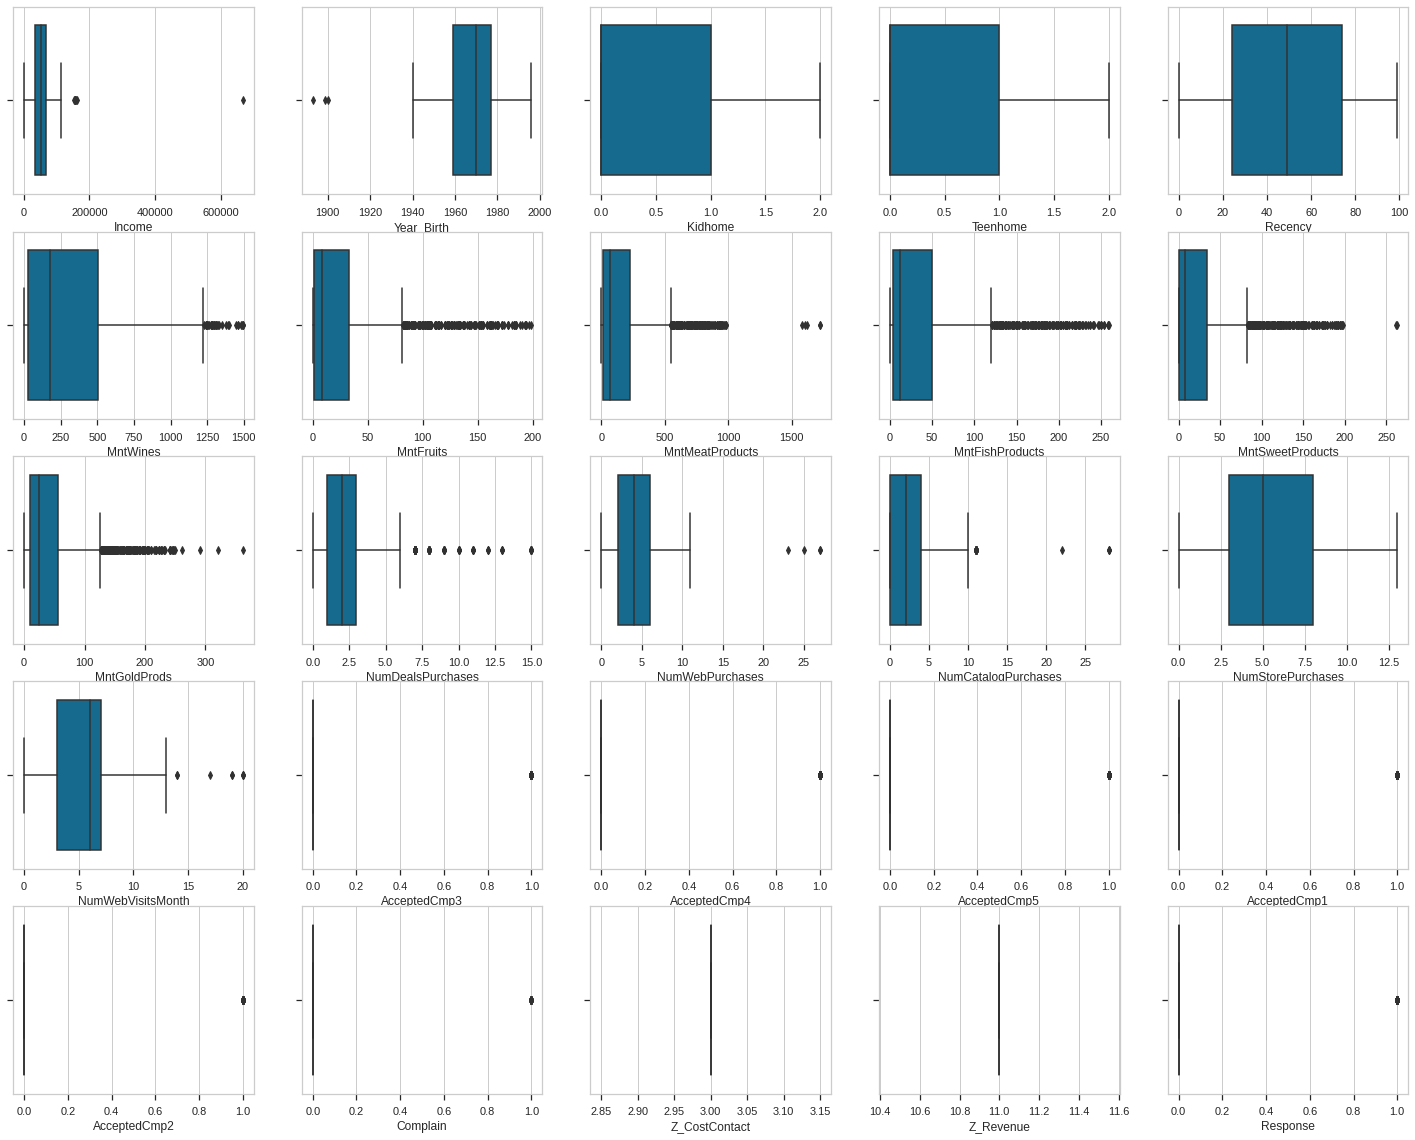

In [13]:
sns.set_context('notebook')
fig,ax = plt.subplots(nrows=5,ncols=5,figsize=(25,20))
x = y = 0
for i in numerical_variables:
  sns.boxplot(df[i],ax=ax[x][y])
  y+=1
  if y == 5:
    x+=1
    y=0

In [14]:
ind = df[(df['NumDealsPurchases']>7.0) | (df['NumWebPurchases']>20) | (df['NumCatalogPurchases']>10) | (df['NumWebVisitsMonth']>=14) | (df['MntSweetProducts']>250) |
         (df['MntMeatProducts']>1500) | (df['MntGoldProds']>270) | (df['Year_Birth']<1940) | (df['Income']>120000)].index
df.drop(ind,inplace=True)

In [15]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [16]:
df['Complain'].value_counts()

0    1958
1      19
Name: Complain, dtype: int64

<AxesSubplot:>

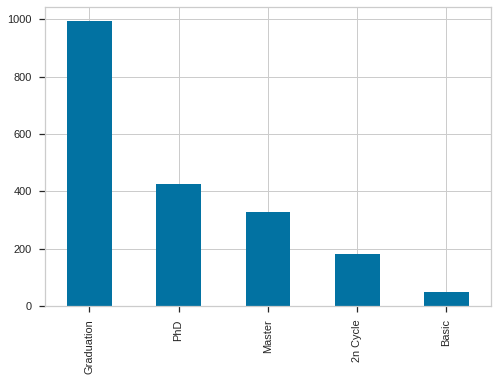

In [33]:
df.Education.value_counts().plot(kind='bar')

In [18]:
df['Education'] = df['Education'].replace({'Graduation':'UnderGraduate','Basic':'High School','2n Cycle':'Graduate','Master':'Graduate','phD':'Post Graduate'})

<AxesSubplot:xlabel='Income', ylabel='Count'>

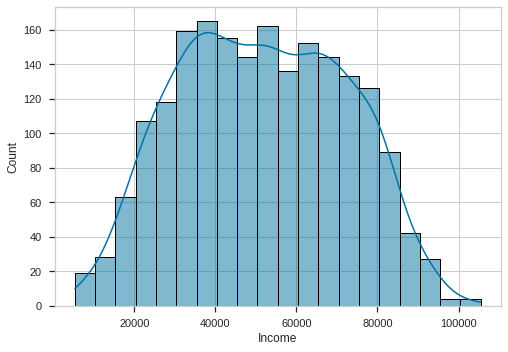

In [19]:
sns.histplot(data=df,x='Income',kde=True)

<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

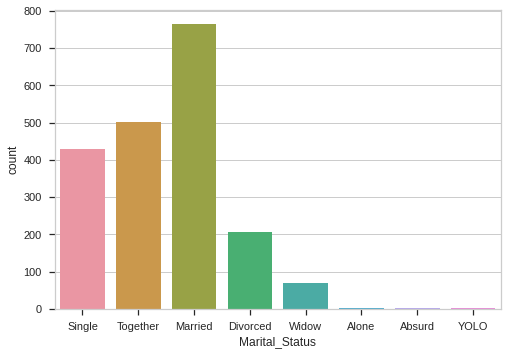

In [20]:
sns.countplot(df['Marital_Status'])

In [21]:
df.Marital_Status.value_counts()

Married     765
Together    501
Single      429
Divorced    207
Widow        68
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [22]:
def Single(s):
  singles = {'Divorced','Widow','YOLO','Absurd','Alone','Single'}
  if s in singles:
    return 'Yes'
  else:
    return 'No' 

In [23]:
df['Single'] = df['Marital_Status'].apply(Single)

In [24]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [25]:
df['Numchildrens'] = df['Kidhome']+df['Teenhome']
df['Age'] = 2023-df['Year_Birth']
df['Spent'] = df[['MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']].sum(axis=1)
df['YearsWithCompany'] = 2023 - df['Dt_Customer'].apply(lambda x: x.year)

In [26]:
df.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Numchildrens,Age,Spent,YearsWithCompany
count,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000,...,1977.00000,1977.000000,1977.000000,1977.0,1977.0,1977.000000,1977.000000,1977.000000,1977.000000,1977.000000
mean,1968.984825,51582.969286,0.441578,0.503288,49.085989,300.551846,26.125443,162.267071,37.556904,26.827516,...,0.06525,0.013151,0.009611,3.0,11.0,0.149216,0.944866,54.015175,596.039454,9.961558
std,11.681839,20375.333772,0.537793,0.544678,29.006869,336.246488,39.513648,215.332944,55.023421,40.998791,...,0.24703,0.113951,0.097586,0.0,0.0,0.356391,0.738265,11.681839,600.717411,0.684959
min,1940.000000,5305.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,27.000000,8.000000,9.000000
25%,1959.000000,35388.000000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,...,0.00000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,45.000000,68.000000,9.000000
50%,1970.000000,51411.000000,0.000000,0.000000,49.000000,171.000000,8.000000,64.000000,12.000000,8.000000,...,0.00000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,53.000000,369.000000,10.000000
75%,1978.000000,67786.000000,1.000000,1.000000,74.000000,502.000000,33.000000,222.000000,50.000000,33.000000,...,0.00000,0.000000,0.000000,3.0,11.0,0.000000,1.000000,64.000000,1033.000000,10.000000
max,1996.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,984.000000,259.000000,198.000000,...,1.00000,1.000000,1.000000,3.0,11.0,1.000000,3.000000,83.000000,2525.000000,11.000000


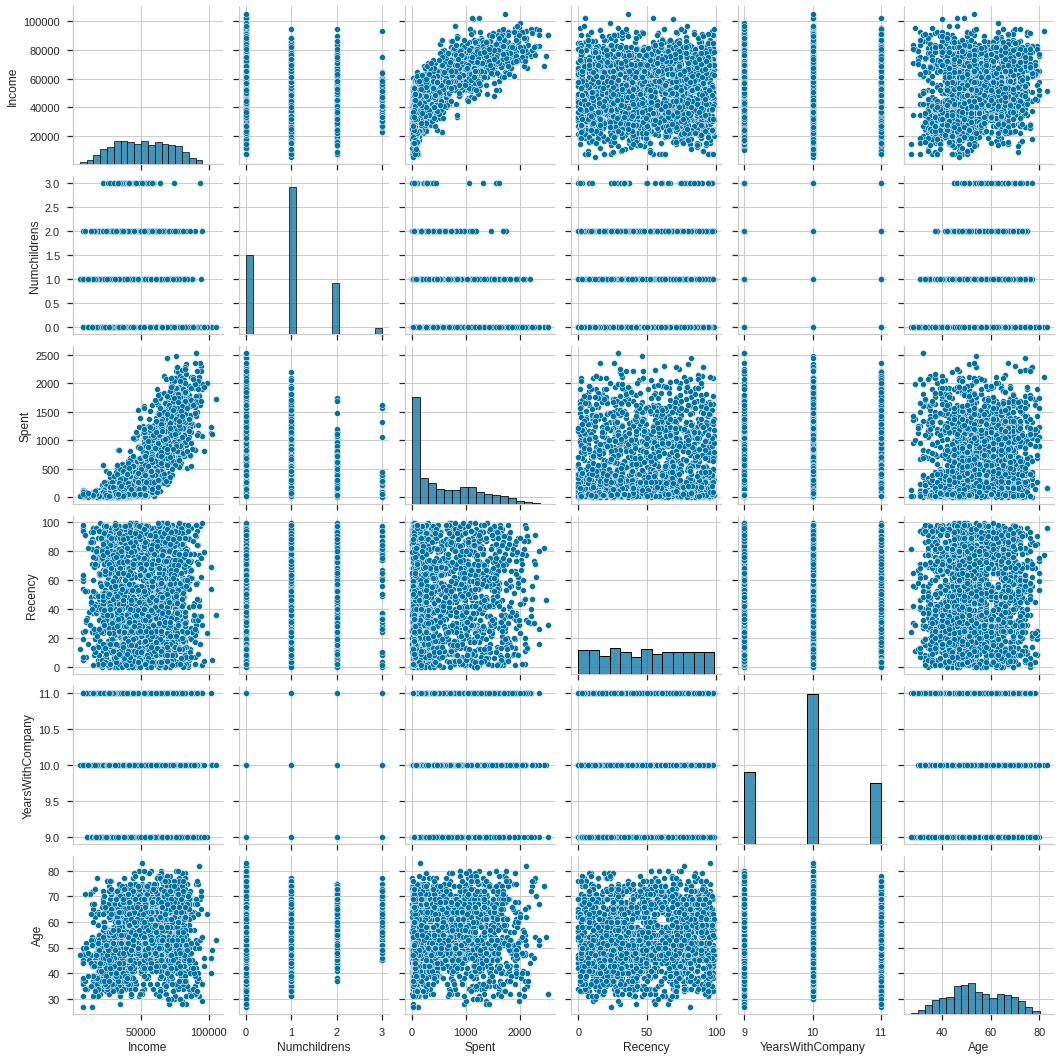

In [27]:
imp_columns = ['Income','Numchildrens','Spent','Recency','YearsWithCompany','Age']
sns.pairplot(data=df[imp_columns])

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1977 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           1977 non-null   int64         
 1   Education            1977 non-null   object        
 2   Marital_Status       1977 non-null   object        
 3   Income               1977 non-null   float64       
 4   Kidhome              1977 non-null   int64         
 5   Teenhome             1977 non-null   int64         
 6   Dt_Customer          1977 non-null   datetime64[ns]
 7   Recency              1977 non-null   int64         
 8   MntWines             1977 non-null   int64         
 9   MntFruits            1977 non-null   int64         
 10  MntMeatProducts      1977 non-null   int64         
 11  MntFishProducts      1977 non-null   int64         
 12  MntSweetProducts     1977 non-null   int64         
 13  MntGoldProds         1977 non-nul

In [34]:
label_encode = LabelEncoder()
scaler = StandardScaler()
data = pd.DataFrame(index=range(0,len(df)))
for i in ['Marital_Status','Education','Single']:
  df[i] = label_encode.fit_transform(df[i])
for i in df.columns:
  if i!='Dt_Customer' or df[i].dtypes==int or df[i].dtypes==float:
    data[i] = scaler.fit_transform(df[[i]])

In [35]:
data.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Single,Numchildrens,Age,Spent,YearsWithCompany
count,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,...,1.977000e+03,1.977000e+03,1977.0,1977.0,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03,1.977000e+03
mean,1.329797e-15,1.347767e-17,2.291204e-17,2.151935e-16,9.883624e-17,4.672259e-17,8.176453e-17,8.625708e-17,3.594045e-17,4.043301e-17,...,3.234641e-17,-3.504194e-17,0.0,0.0,-1.078214e-17,1.078214e-17,-6.109877e-17,-1.132124e-16,-6.334505e-17,-5.193395e-16
std,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,...,1.000253e+00,1.000253e+00,0.0,0.0,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00
min,-2.481815e+00,-1.573583e+00,-3.457970e+00,-2.271849e+00,-8.213002e-01,-9.242431e-01,-1.692648e+00,-8.940700e-01,-6.613424e-01,-7.537543e-01,...,-1.154405e-01,-9.850776e-02,0.0,0.0,-4.187916e-01,-7.494073e-01,-1.280170e+00,-2.313164e+00,-9.791430e-01,-1.404173e+00
25%,-8.549469e-01,-1.573583e+00,-6.694969e-01,-7.950332e-01,-8.213002e-01,-9.242431e-01,-8.650480e-01,-8.256505e-01,-6.360283e-01,-6.794319e-01,...,-1.154405e-01,-9.850776e-02,0.0,0.0,-4.187916e-01,-7.494073e-01,-1.280170e+00,-7.719209e-01,-8.792371e-01,-1.404173e+00
50%,8.692393e-02,8.318088e-01,2.599942e-01,-8.442207e-03,-8.213002e-01,-9.242431e-01,-2.965181e-03,-3.853858e-01,-4.588295e-01,-4.564649e-01,...,-1.154405e-01,-9.850776e-02,0.0,0.0,-4.187916e-01,-7.494073e-01,7.469942e-02,-8.692393e-02,-3.780428e-01,5.613737e-02
75%,7.719209e-01,8.318088e-01,1.189485e+00,7.954289e-01,1.038620e+00,9.121676e-01,8.591177e-01,5.992602e-01,1.740233e-01,2.774682e-01,...,-1.154405e-01,-9.850776e-02,0.0,0.0,-4.187916e-01,1.334388e+00,7.469942e-02,8.549469e-01,7.275819e-01,5.613737e-02
max,2.313164e+00,8.318088e-01,3.048468e+00,2.645437e+00,2.898541e+00,2.748578e+00,1.721201e+00,3.547248e+00,4.376166e+00,3.817070e+00,...,8.662474e+00,1.015148e+01,0.0,0.0,2.387822e+00,1.334388e+00,2.784438e+00,2.481815e+00,3.211907e+00,1.516448e+00


<AxesSubplot:>

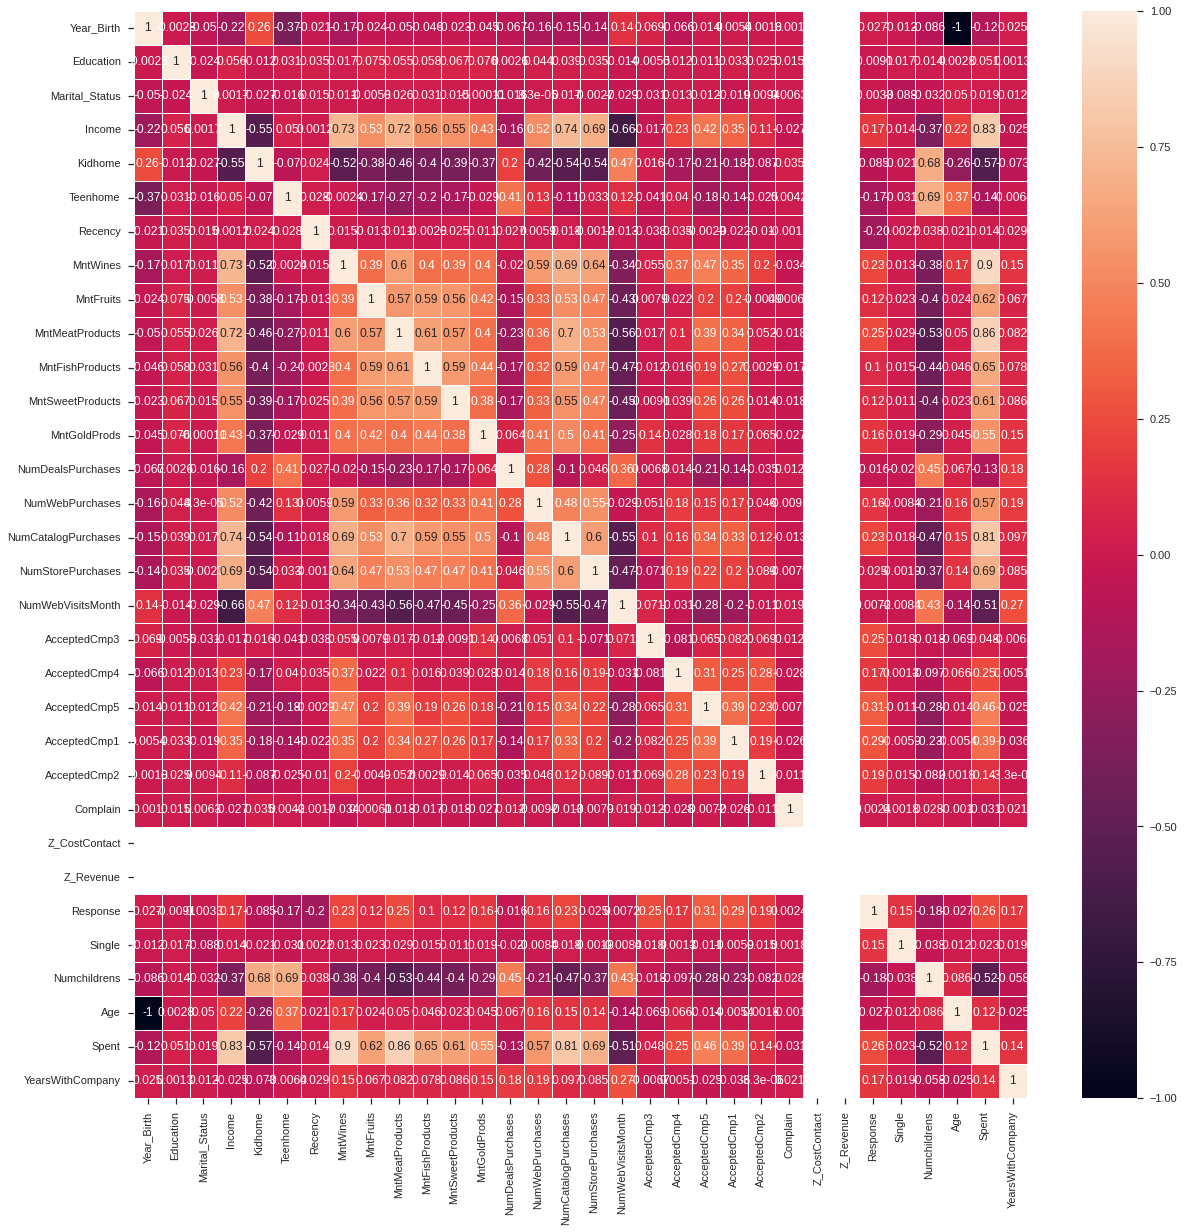

In [31]:
fig,ax = plt.subplots(figsize=(20,20))
corr_mat = data.corr()
sns.heatmap(corr_mat,ax=ax,annot=True,linewidth=0.5)

In [32]:
del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2','Z_CostContact', 'Z_Revenue', 'Response']
data1 = data.drop(del_cols,axis=1)

###Modelling

In [36]:
pca = PCA(n_components=3,random_state=8457)
pca_data = pca.fit_transform(data1)

In [37]:
pca_data = pd.DataFrame(pca_data,columns=['c1','c2','c3'])

In [38]:
def elbow_method(X,n_clu):
  inertia = []
  for i in range(2,n_clu):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=8457)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
  sns.lineplot(range(2,n_clu),inertia)
  sns.scatterplot(range(2,n_clu),inertia)
  plt.xticks(range(2,n_clu))
  plt.xlabel('number of custers')
  plt.ylabel('inertia')
  plt.title('Elbow Method')
  plt.show()

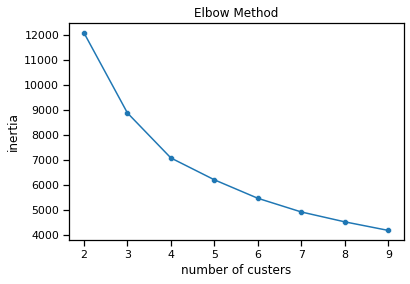

In [39]:
elbow_method(pca_data,10)

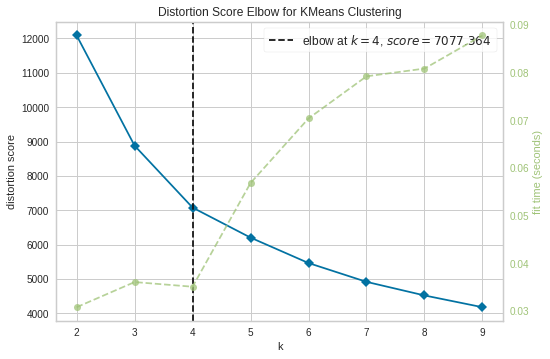

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(init='k-means++',random_state=8457)
visualizer = KElbowVisualizer(model,k=(2,10))
visualizer.fit(pca_data)
visualizer.show()

from the above elbow curves, 

We can see that the number of clusters is 4, which has an inflection point, indicating that it is the optimal number of clusters.

In [41]:
agglo_model = AgglomerativeClustering(n_clusters=4,linkage='ward')
agglo_model.fit(pca_data)

AgglomerativeClustering(n_clusters=4)

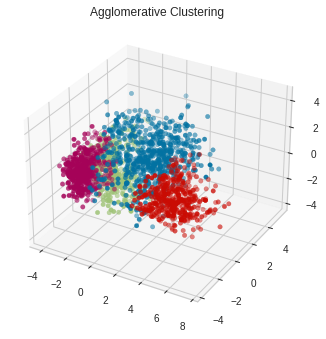

In [42]:
ax = plt.axes(projection='3d')
for label in set(agglo_model.labels_):
  x = pca_data[agglo_model.labels_==label]
  ax.scatter3D(x.iloc[:,0],x.iloc[:,1],x.iloc[:,2])
ax.set(title='Agglomerative Clustering')
plt.show()

In [43]:
df['Clusters'] = agglo_model.labels_

###Interpretation

In [44]:
comp = []
for i in set(agglo_model.labels_):
  comp.append(len(df[df['Complain'] & df['Clusters']==i]))
comp

[1967, 10, 0, 0]

Text(0.5, 1.0, 'Complaints')

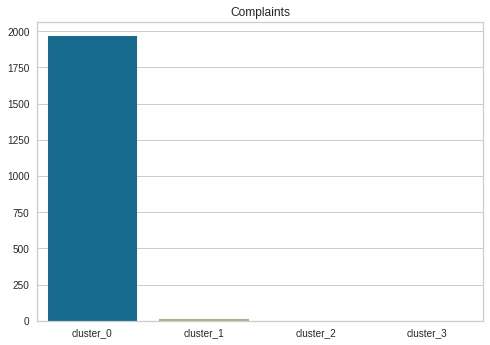

In [45]:
sns.barplot(x=['cluster_0','cluster_1','cluster_2','cluster_3'],y=comp)
plt.title('Complaints')

from above barplot, 

we got more complaints from cluster_0.

<AxesSubplot:xlabel='Income', ylabel='Spent'>

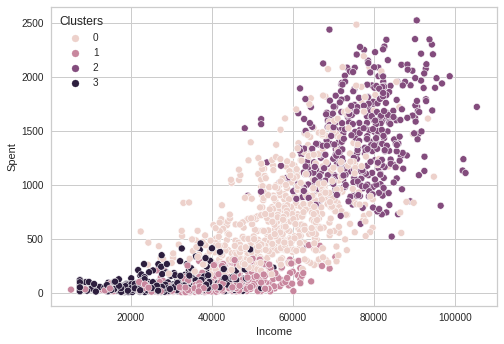

In [46]:
sns.scatterplot(data=df,x='Income',y='Spent',hue='Clusters')

from the above scatter plot, we can say,

cluster_2 = more income more spent

cluster_1 = low income low spent

cluster_0 = average income average spent

cluster_3 = less income and more spent than cluster_1 but lower than cluster_0



In [47]:
kids = df[df['Kidhome']!=0]
teens = df[df['Teenhome']!=0]
stats.ttest_ind(kids['Spent'],teens['Spent'],alternative='less')

Ttest_indResult(statistic=-17.366744372224648, pvalue=7.912298841944697e-63)

--> from the above t-test we can conclude that the family with teenagers spent more than the families with kids

H0 = mean of money spend by families with kids and teenagers are equal

H1 = mean of money spend by families with kids less than money spend by families with teenagers.

we got p-value = 0.000000000000...something
i.e, p-value < 0.05 means we reject Null hypothesis and accept the alternative hypothesis

Text(0.5, 1.0, 'Which cluster spent more money')

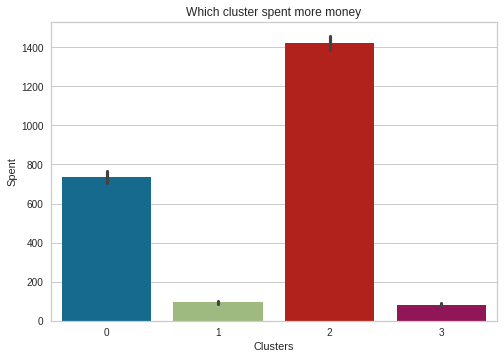

In [48]:
sns.barplot(data=df,x='Clusters',y='Spent')
plt.title('Which cluster spent more money')

--> from the above barplot,

cluster_2 customers spent more money than any other customers.

whereas, cluster_0 customers are the 2nd who spend more than 1 and 3.

In [49]:
prod = []
for i in set(df['Clusters']):
  cluster = df[df['Clusters']==i][['MntWines', 'MntFruits',
        'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
        'MntGoldProds']]
  scaler = MinMaxScaler()
  cluster = scaler.fit_transform(cluster)
  prod.append(cluster.sum(axis=0))

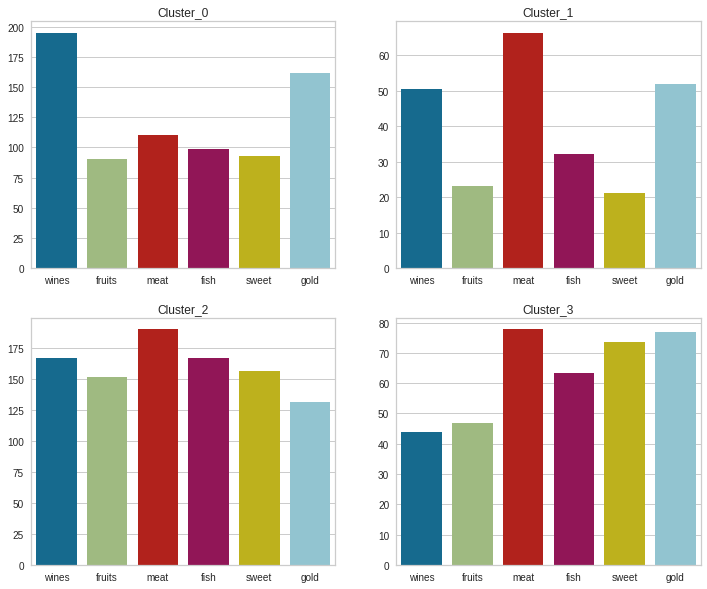

In [50]:
fig,ax = plt.subplots(2,2,figsize=(12,10))
x,y = 0,0
for i in range(len(prod)):
  sns.barplot(x=['wines','fruits','meat','fish','sweet','gold'],y=prod[i],ax=ax[x][y])
  ax[x][y].set(title='Cluster_{}'.format(i))
  y+=1
  if y==2:
    x+=1
    y=0

from the above graph,

cluster_0 : They perfer to spend more money on wines

cluster_1 : They perfer to spend more money on meat

cluster_2 : They perfer to spend more money on meat, wines and fish

cluster_3 : They perfer to spend more money on meat, gold and sweet

<AxesSubplot:xlabel='YearsWithCompany', ylabel='Count'>

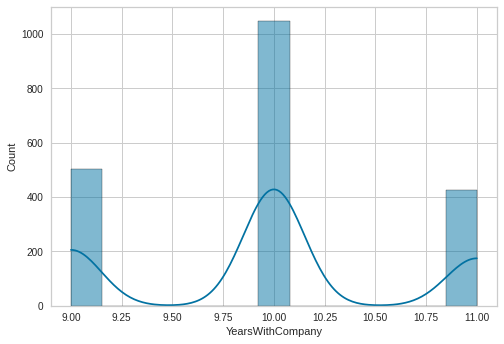

In [51]:
sns.histplot(df['YearsWithCompany'],kde=True)